### **Introduction**
Our project is to use CSVs and Python to determine the "best neighboorhood" with a metric of our choosing. We decided to determine the best neighborhood by determining which neighborhood is the most "green", since its good for the residents' happiness and futures. 
We used four different data sets, each of which corresponds to a factor that makes a city/neighborhood more environmentally friendly. Each of these factors is essentially a count of something green in a neighborhood. Although we could calculate it by a simple count of each, our group feels that certain factors are more important than others, due to being more rare and/or more impactful on the environment. Therefore, some of them are weighted more than others.

### **The Metric**

##### **Dataset 1:** green-spaces-locations-pgh.csv 
- This is the list of each of the Green Spaces in Pittsburgh, as per the Operations Division of the Department of Public Works.
- The more green spaces a neighborhood has, the more green it is. 
- This is weighted by a factor of 2x.

##### **Dataset 2:** greenways-locations-pgh.csv
- This is the list of the of Greenways in Pittsburgh, given by Greenways.
- The more greenways a neighborhood has, the more green it is. 
- This is weighted by a factor of 3x.

##### **Dataset 3:** recyling-centers-locations-pgh.csv
- This is a list of locations where city residents are encouraged to drop off, dispose, or recycle of unwanted materials, given by Waste Recovery Locations.
- The more recyling centers a neighborhood has, the more green it is.
- This is weighted by a factor of 2x.

##### **Dataset 4:** smart-trash-locations-pgh.csv
- This is a list of locations of the City of Pittsburgh's Smart Trash Containers.
- The more smart trash containers a neighborhood has, the more green it is. 
- This is weighted by a factor of 1x.

### **The Best Neighborhood**

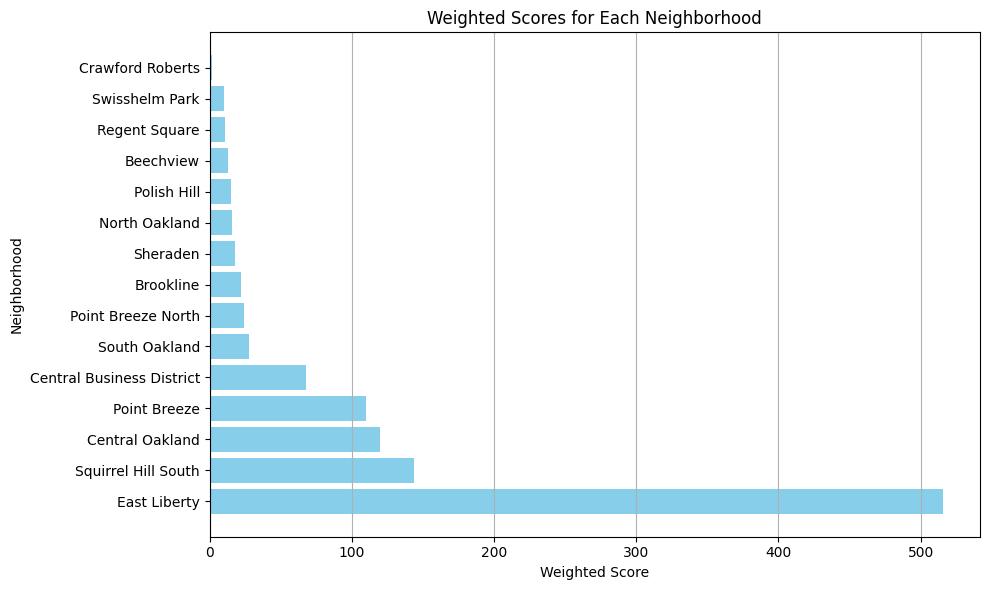

The best neighborhood overall based on the weighted factors is: East Liberty
Weighted score (overall): 516


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Weight factors for each dataset
weight_factors = {
    'green_spaces': 2,
    'greenways': 3,
    'recycling_centers': 2,
    'smart_trash_containers': 1
}

# Read and process each dataset
datasets = {
    'green_spaces': pd.read_csv('green-spaces-locations-pgh.csv'),
    'greenways': pd.read_csv('greenways-locations-pgh.csv'),
    'recycling_centers': pd.read_csv('recyling-centers-locations-pgh.csv'),
    'smart_trash_containers': pd.read_csv('smart-trash-locations-pgh.csv')
}

# Calculate counts for each dataset
counts = {}
for dataset_name, dataset in datasets.items():
    if dataset_name == 'green_spaces':
        # Filter out rows where the Facility column is not empty
        green_spaces = dataset[dataset['Facility'].notnull()]
        # Count the number of green spaces in each neighborhood
        counts[dataset_name] = green_spaces['Neighborhood'].value_counts()
    elif dataset_name == 'greenways':
        # Count the number of greenways in each neighborhood
        counts[dataset_name] = dataset['nhood'].value_counts()
    elif dataset_name == 'recycling_centers':
        # Grouping by neighborhood and counting the number of entries for each neighborhood
        counts[dataset_name] = dataset.groupby('neighborhood').size()
    elif dataset_name == 'smart_trash_containers':
        # Grouping by neighborhood and counting the number of smart trash locations for each neighborhood
        counts[dataset_name] = dataset.groupby('neighborhood').size()

# Calculate weighted scores for each neighborhood
weighted_scores = {}
for neighborhood, count in counts['green_spaces'].items():
    weighted_score = 0
    for dataset_name, dataset_count in counts.items():
        weighted_score += count * weight_factors.get(dataset_name, 1) * dataset_count.get(neighborhood, 0)
    weighted_scores[neighborhood] = weighted_score

# Find the best neighborhood overall
best_neighborhood = max(weighted_scores, key=weighted_scores.get)
best_score = weighted_scores[best_neighborhood]

# Data Visualization - Graph of all the neighborhoods
# Convert weighted_scores dictionary to a DataFrame for easier plotting
neighborhood_scores_df = pd.DataFrame(list(weighted_scores.items()), columns=['Neighborhood', 'Weighted Score'])
# Sort neighborhoods by their weighted scores
neighborhood_scores_df = neighborhood_scores_df.sort_values(by='Weighted Score', ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(neighborhood_scores_df['Neighborhood'], neighborhood_scores_df['Weighted Score'], color='skyblue')
plt.xlabel('Weighted Score')
plt.ylabel('Neighborhood')
plt.title('Weighted Scores for Each Neighborhood')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Display the best neighborhood overall and its score
print("The best neighborhood overall based on the weighted factors is:", best_neighborhood)
print("Weighted score (overall):", best_score)

Next, we're using k-means clustering to visualize the difference between neighborhoods. We will use the sum of the weighted factors to determine the differnece in the best neighborhood, and see which neighborhoods were similar to each other.

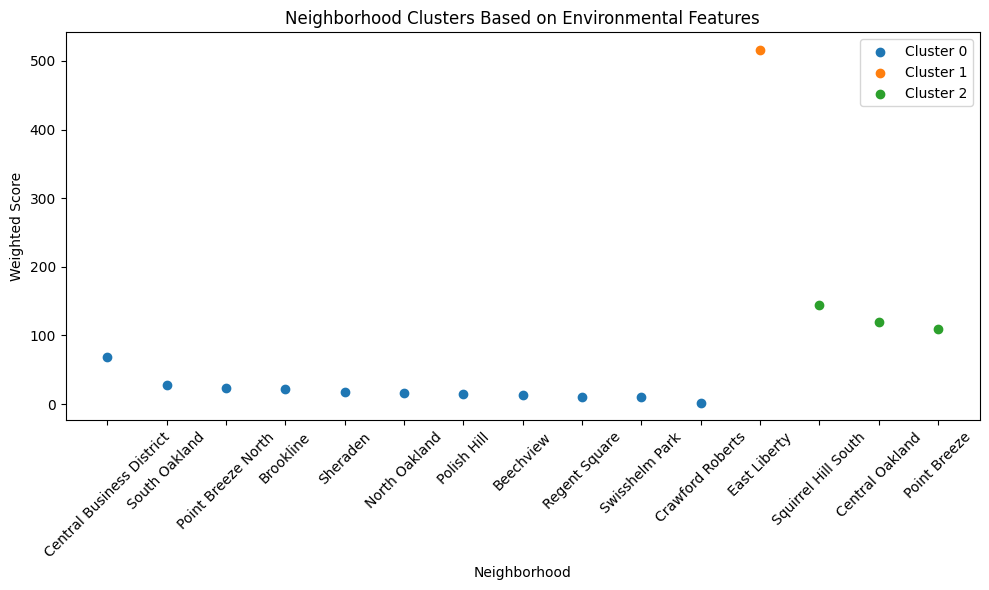

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# normalize scores
data_for_clustering = neighborhood_scores_df[['Weighted Score']]
normalized_data = scaler.fit_transform(data_for_clustering)
normalized_data_df = pd.DataFrame(normalized_data, columns=['Normalized Score'], index=neighborhood_scores_df.index)

from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(normalized_data_df)

# create cluster labels
neighborhood_scores_df['Cluster'] = kmeans.labels_

import matplotlib.pyplot as plt

# plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(neighborhood_scores_df['Cluster'].unique()):
    clustered_data = neighborhood_scores_df[neighborhood_scores_df['Cluster'] == cluster]
    plt.scatter(clustered_data['Neighborhood'], clustered_data['Weighted Score'], label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('Neighborhood')
plt.ylabel('Weighted Score')
plt.title('Neighborhood Clusters Based on Environmental Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Conclusion**

**Krit:** I was honestly shocked that East Liberty turned out to be the best neighborhood. It is my personal favorite neighborhood, not because of how green it is, but because of the food/shopping options, the walkability, and the buildings. It makes sense that East Liberty is a green neighborhood and I guess subconciously it boosts my mental image of it, but that's not why it was my favorite neighborhood.

**Anirudh:**: I was pretty surprised that East Liberty would be the greenest neighborhood. After looking at the clustering, it was cool to see just how much more 'green' East Liberty was compared to the other neighborhoods. I usually go to East Liberty for Target, Whole Foods, and Trader Joes, and not much else, but in hindsight, it makes sense that East Liberty is the greenest, especially because of how walkable it is. I think it's interesting to see how the data can show us things that we might not have known before.